# Part II: Connecting Python to SQL

# TASK

### Total Question(4)
1. Write a query to show the quantity of items sold by each department. Sort the results by department name.

2. Using the query you wrote in Question 1, create a data visualization (e.g., a bar chart) showing all departments and the number of items each of them sold. Using a markdown cell, explain what you observe from the analysis.

3. Write a query to show the number of orders placed in each year in which at least one order was placed. Hint: Search online to learn about MySQL’s YEAR() function to query data.

4. Using the query you wrote in Question 3, create a data visualization (e.g., a line graph) showing all years and the number of orders placed during each year, to see if there is a trend in ordering. Using a markdown cell, explain what you observe from the analysis.


In [1]:
#  First we need to connect the python with SQL connector

!pip install mysql_connector_python

In [2]:
#importing libaries that are essential for visualisation and analysis

import mysql.connector
import pandas as pd
import numpy as np

In [3]:
#connecting the database from MySQL
conn = mysql.connector.connect(host='127.0.0.1', database='terpbuy', user='root', password='Lakshaysh_19')

# Question 1

## Write a query to show the quantity of items sold by each department. Sort the results by department name.

In [4]:
# SQL query to show quantity sold by each department and sorting them by department
department_sales = pd.read_sql("""SELECT department.department_name as Department,\n
                            sum(order_line.quantity_sold) AS Quantity_Sold
                            FROM order_line 
                            INNER JOIN product 
                            ON product.product_id = order_line.product_id
                            INNER JOIN department 
                            ON department.department_id = product.department_id
                            GROUP BY department.department_name
                            ORDER BY department.department_name""", conn)
department_sales

C:\Users\laksh\AppData\Local\Temp\ipykernel_6640\1121249523.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  department_sales = pd.read_sql("""SELECT department.department_name as Department,\n


,Department,Quantity_Sold
0,Apparel,2336.0
1,Book Shop,12.0
2,Discs Shop,285.0
3,Fan Shop,2406.0
4,Fitness,244.0
5,Footwear,932.0
6,Golf,2355.0
7,Health and Beauty,64.0
8,Outdoors,812.0
9,Pet Shop,54.0


# Question 2

### Using the query you wrote in Question 1, create a data visualization (e.g., a bar chart) showing all departments and the number of items each of them sold. Using a markdown cell, explain what you observe from the analysis.

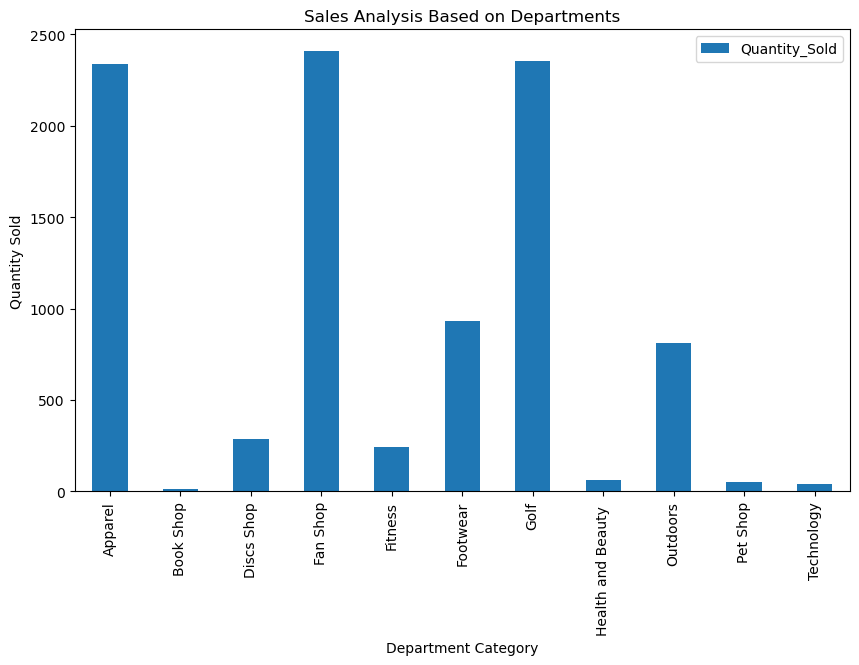

None


In [5]:
import matplotlib.pyplot as plt

# Data visualization that shows all departments and the number of items sold by them

department_sales.plot(kind = 'bar', x="Department", y = 'Quantity_Sold', figsize = (10, 6))
plt.title('Sales Analysis Based on Departments')
plt.xlabel('Department Category')
plt.ylabel('Quantity Sold')
print(plt.show())


### Based on the bar-chart . In 'Apparrel, Fan Shop, and Golf' categories Items are sold are more as compare to other department whereas , The sales in 'Book Shop, Technology, Pet Shop and Health & Beauty' categories are very low.


# Question 3

### Write a query to show the number of orders placed in each year in which at least one order was placed.

In [9]:
year_df = pd.read_sql('SELECT YEAR(order_date) as Year, count(order_id) as Total_Order \
                      FROM orders GROUP BY YEAR \
                      HAVING count(order_id) > 0;', conn)
print(year_df)

   Year  Total_Order
0  2018          585
1  2019          708
2  2020          497
3  2021          362


C:\Users\laksh\AppData\Local\Temp\ipykernel_6640\1522732509.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  year_df = pd.read_sql('SELECT YEAR(order_date) as Year, count(order_id) as Total_Order \


# Question 4

### Using the query you wrote in Question 3, create a data visualization (e.g., a line graph) showing all years and the number of orders placed during each year, to see if there is a trend in ordering. Using a markdown cell, explain what you observe from the analysis

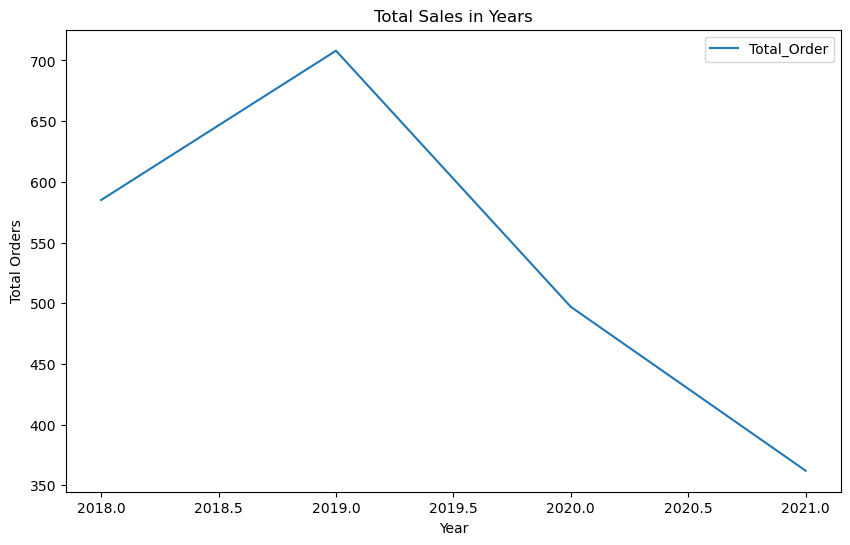

In [13]:
# Creating a line graph from analysis question 3
year_df.plot(kind = 'line', x = 'Year', y = 'Total_Order', figsize =(10,6))
plt.title('Total Sales in Years')
plt.xlabel('Year')
plt.ylabel('Total Orders')
plt.show()

### Based on above observation, seems that 2019 records the highest sales , whereas downfall is seen after 2019.